<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Aula_calibra%C3%A7%C3%A3o_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importação das bibliotecas padrão

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/FLAI-Cursos/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Dados/base_calibracao.csv')
data.head(3)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0


# **Separando entre X e y**

In [2]:
X = data.drop('Response', axis = 1)
y = data['Response']

from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.5)

# **Utilizando RobustScaler e GNB**

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_s, y_train)

GaussianNB()

In [17]:
from sklearn.metrics import roc_auc_score

preds = gnb.predict(X_test_s)

roc_auc_score(y_test, preds)

0.7083333333333334

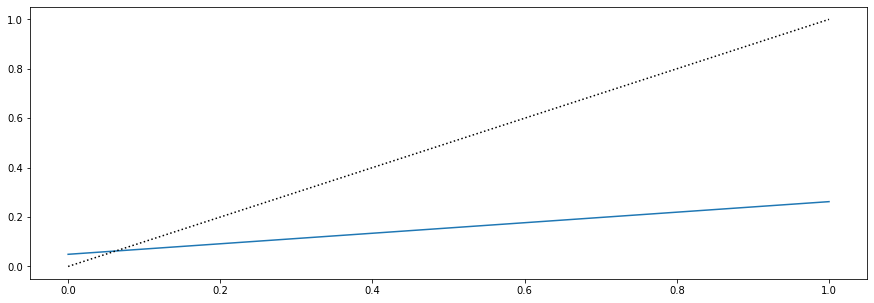

In [13]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, preds)

plt.figure(figsize=(15,5))
plt.plot(prob_pred, prob_true)
plt.plot((0,1),(0,1),'k:');                               

# **Utilizando Logistic regression para ter uma probabilidade**

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_test_s, y_test, test_size = 0.5)

from sklearn.linear_model import LogisticRegression

preds_train = gnb.predict_proba(X_train2)[:,1]
preds_test  = gnb.predict_proba(X_test2)[:,1]

lr = LogisticRegression()

pred_train_data = pd.DataFrame(np.array([preds_train]).T,columns=['pred'])
pred_test_data = pd.DataFrame(np.array([preds_test]).T,columns=['pred'])

lr.fit(pred_train_data, y_train2)

preds_2 = lr.predict_proba(pred_test_data)[:,1]

In [21]:
print('Original: ', roc_auc_score(y_test2, preds_test))
print('Reg.Log: ', roc_auc_score(y_test2, preds_2))

Original:  0.8075951605162789
Reg.Log:  0.8075951605162789


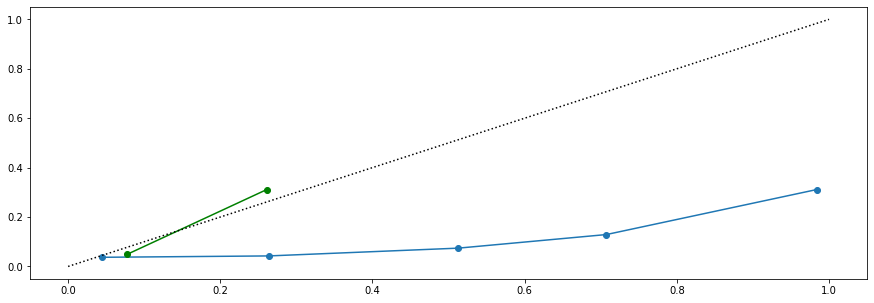

In [22]:
prob_true, prob_pred = calibration_curve(y_test2, preds_test)
prob_true_2, prob_pred_2 = calibration_curve(y_test2, preds_2)

plt.figure(figsize=(15,5))
plt.plot(prob_pred, prob_true, 'o-')
plt.plot(prob_pred_2, prob_true_2, 'go-')
plt.plot((0,1),(0,1),'k:');  